In [1]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import Adam

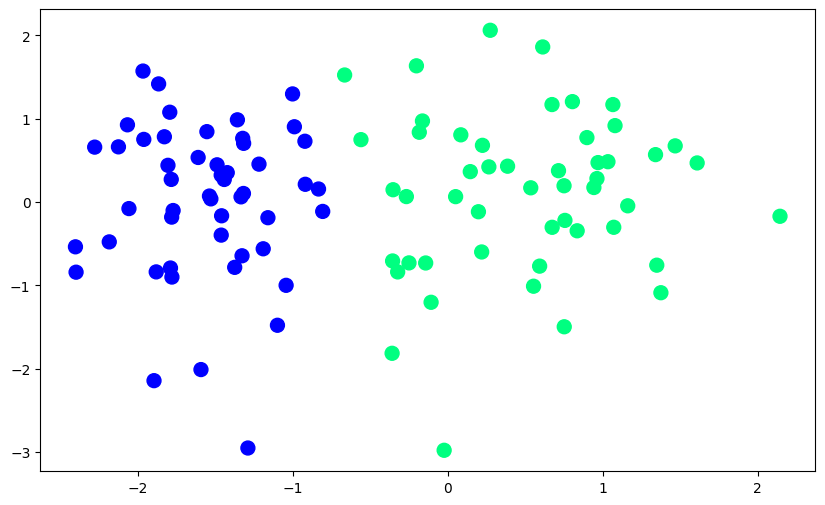

In [3]:
X, y = datasets.make_classification(n_samples = 100, n_features = 2, n_informative=1, n_redundant=0, n_classes=2, n_clusters_per_class=1, hypercube=False, class_sep = 10, random_state = 41)
plt.figure(figsize=(10, 6))
plt.scatter(X[:,0], X[:,1], c = y, cmap = 'winter', s = 100)

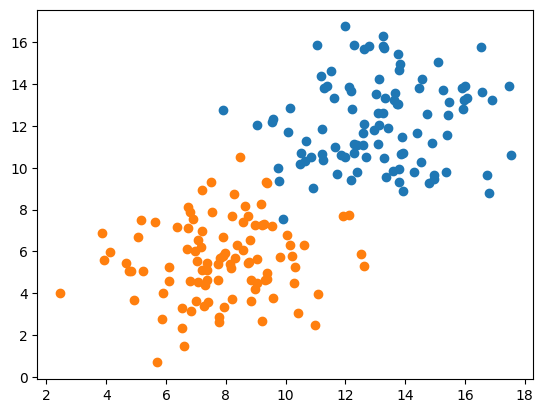

In [4]:
n_pts = 100
np.random.seed(0)
Xa = np.array([np.random.normal(13, 2, n_pts),
                np.random.normal(12, 2, n_pts)]).T
Xb = np.array([np.random.normal(8, 2, n_pts),
                np.random.normal(6, 2, n_pts)]).T

X = np.vstack((Xa, Xb))
ya = np.zeros(n_pts)
yb = np.ones(n_pts)

y = np.hstack((ya, yb))
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])

In [5]:
print(X.shape)
print(y.shape)

(200, 2)
(200,)


In [6]:
def perceptron(X, y):
    lr = 0.1
    X = np.insert(X, 0, 1, axis = 1)
    n = X.shape[0]
    weights = np.ones(X.shape[1])
    for i in range(10000):
        j = np.random.randint(0, n)
        y_pred = np.where(np.inner(X[j], weights) > 0 , 1, 0)
        weights = weights + lr * (y[j] - y_pred) * X[j]
    return weights[0], weights[1:]

In [7]:
intercept , coef = perceptron(X, y)
m = - (coef[0] / coef[1])
b = - (intercept/coef[1])
x = np.linspace(X[:,0].min(), X[:,0].max(), 100)
y = m * x + b

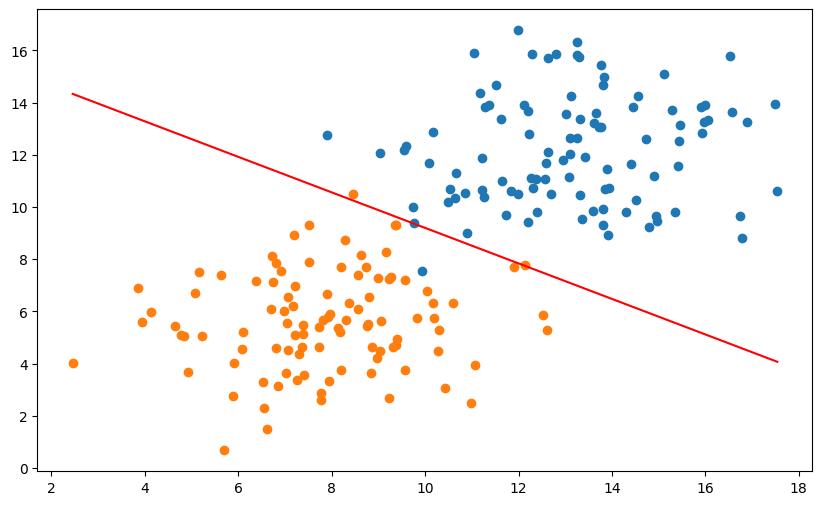

In [8]:
plt.figure(figsize = (10, 6))
n_pts = 100
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])
plt.plot(x, y , color = 'r')

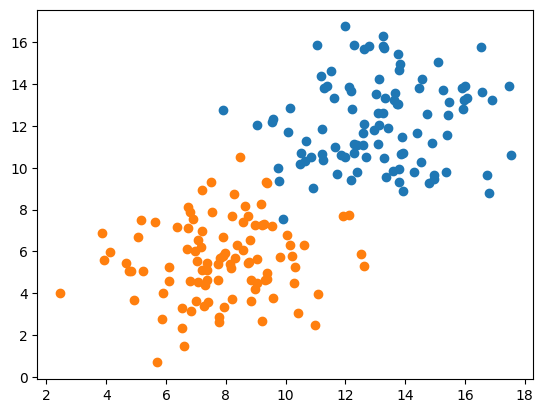

In [9]:
n_pts = 100
np.random.seed(0)
Xa = np.array([np.random.normal(13, 2, n_pts),
                np.random.normal(12, 2, n_pts)]).T
Xb = np.array([np.random.normal(8, 2, n_pts),
                np.random.normal(6, 2, n_pts)]).T

X = np.vstack((Xa, Xb))
Y = np.matrix(np.append(np.zeros(n_pts), np.ones(n_pts))).T
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])

In [10]:
model = Sequential()
model.add(Dense(units = 1, input_shape = (2,), activation = 'sigmoid'))
lr = 0.1
model.compile(Adam(lr), loss = 'binary_crossentropy', metrics = ['accuracy'])
h = model.fit(x = X, y = Y, verbose = 1, batch_size = 50, epochs = 100, shuffle = True)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4233 - loss: 1.1647  
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4380 - loss: 0.8836 
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5167 - loss: 0.8705 
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5553 - loss: 0.6967 
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6327 - loss: 0.5773 
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7267 - loss: 0.5027 
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9627 - loss: 0.4462 
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8680 - loss: 0.4167 
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8753 - loss: 0.3969 
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8767 - loss: 0.3809 
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8887 - loss: 0.3523 
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8920 - loss: 0.3344 


Text(0.5, 1.0, 'loss')

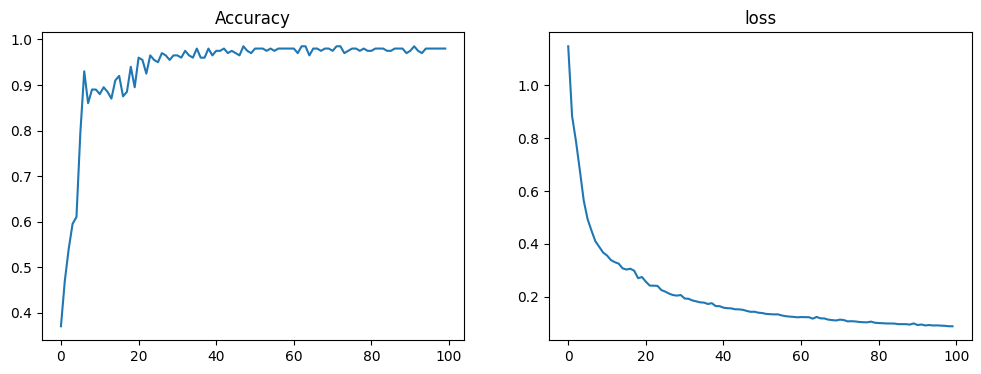

In [11]:
_, ax = plt.subplots(1,2, figsize = (12, 4))
ax[0].plot(h.history['accuracy'])
ax[0].set_title("Accuracy")
ax[1].plot(h.history['loss'])
ax[1].set_title("loss")

In [12]:
def plot_decision_boundary(X, y, model):
    x_span = np.linspace(X[:,0].min() - 1, X[:,0].max() + 1, 50)
    y_span = np.linspace(X[:,1].min() - 1, X[:,1].max() + 1, 50)
    xx, yy = np.meshgrid(x_span, y_span)
    grid = np.c_[xx.ravel(), yy.ravel()]
    pred_func = model.predict(grid)
    z = pred_func.reshape(xx.shape)
    plt.contourf(xx, yy, z)

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
[[0.9911803]]


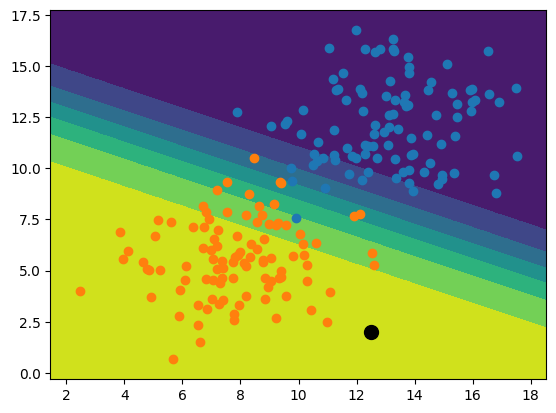

In [13]:
plot_decision_boundary(X, y, model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])
point = np.array([[12.5, 2.]])
pt = model.predict(point)
plt.plot(point[0][0], point[0][1], marker = "o", markersize = 10, color = 'k')
print(pt)

In [14]:
from sklearn import datasets
n_pts = 500
X, y = datasets.make_circles(n_samples = n_pts, random_state = 123, noise = 0.1
                             , factor = 0.2)

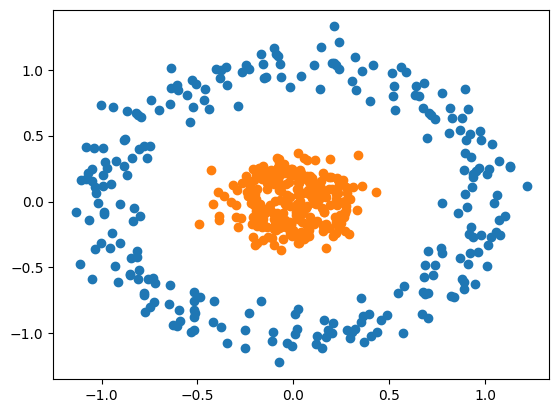

In [15]:
plt.scatter(X[y == 0, 0], X[y == 0, 1])
plt.scatter(X[y == 1, 0], X[y == 1, 1])

In [16]:
model = Sequential()
model.add(Dense(4, input_shape = (2,), activation = 'sigmoid'))
model.add(Dense(1, activation = 'sigmoid'))

In [17]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                      │ (None, 4)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17 (68.00 B)

 Trainable params: 17 (68.00 B)

 Non-trainable params: 0 (0.00 B)

In [18]:
lr = 0.01
adam = Adam(lr)
model.compile(adam, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [19]:
history = model.fit(x = X, y = y, verbose = 1, batch_size = 20, epochs = 100, shuffle = True)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5548 - loss: 0.7120
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4708 - loss: 0.6900 
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6573 - loss: 0.6907 
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4233 - loss: 0.6930
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4806 - loss: 0.6947
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4421 - loss: 0.6913
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5596 - loss: 0.6954
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4748 - loss: 0.6939
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4972 - loss: 0.6923 
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4301 - loss: 0.6893
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6400 - loss: 0.6880
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accura

Text(0.5, 1.0, 'Accuracy')

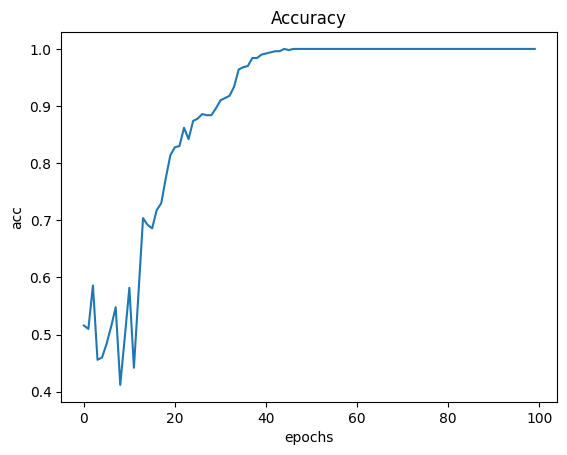

In [20]:
plt.plot(history.history['accuracy'])
plt.ylabel('acc')
plt.xlabel('epochs')
plt.title('Accuracy')

Text(0.5, 1.0, 'Loss')

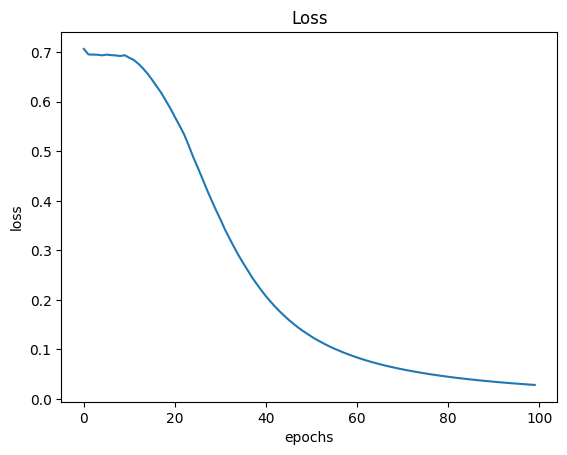

In [21]:
plt.plot(history.history['loss'])
plt.ylabel('loss')
plt.xlabel('epochs')
plt.title('Loss')

In [22]:
def plot_decision_boundary(X, y, model):
    x_span = np.linspace(X[:,0].min() - 0.25, X[:,0].max() + 0.25, 50)
    y_span = np.linspace(X[:,1].min() - 0.25 , X[:,1].max() + 0.25, 50)
    xx, yy = np.meshgrid(x_span, y_span)
    grid = np.c_[xx.ravel(), yy.ravel()]
    pred_func = model.predict(grid)
    z = pred_func.reshape(xx.shape)
    plt.contourf(xx, yy, z)

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


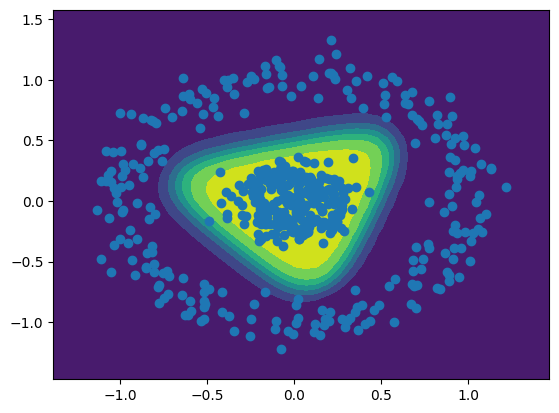

In [23]:
plot_decision_boundary(X, y, model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Prediction is : [[0.0911647]]


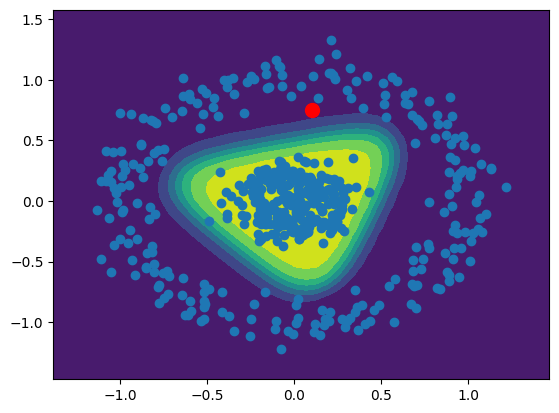

In [24]:
plot_decision_boundary(X, y, model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])
x = 0.1
y = 0.75
point = np.array([[x, y]])
prediction = model.predict(point)
plt.plot([x], [y], marker = 'o', markersize = 10, color = 'r')
print("Prediction is :", prediction)

In [25]:
n_pts = 500
centres = [[-1,1],[-1,-1],[1,-1]]
X, y = datasets.make_blobs(n_samples = n_pts, random_state = 123, centers = centres, cluster_std = 0.4)

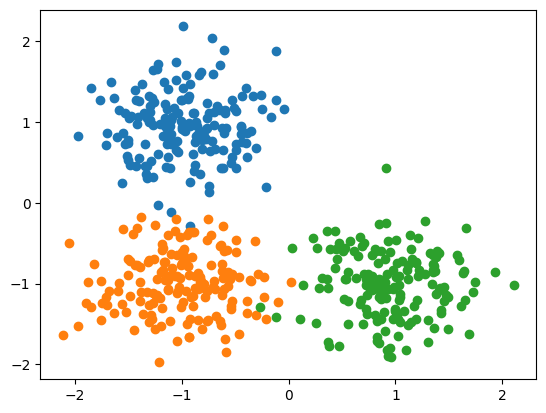

In [26]:
plt.scatter(X[y == 0, 0], X[y == 0, 1])
plt.scatter(X[y == 1, 0], X[y == 1, 1])
plt.scatter(X[y == 2, 0], X[y == 2, 1])

In [27]:
X.shape

(500, 2)

In [28]:
from keras.utils import to_categorical
Y = to_categorical(y, 3)
Y

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [29]:
model = Sequential()
lr = 0.1
adam = Adam(lr)
model.add(Dense(units = 3, input_shape = (2,) , activation = 'softmax'))
model.compile(adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(x = X, y = Y, verbose = 1, batch_size = 50, epochs = 10)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4983 - loss: 0.9301  
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9898 - loss: 0.2681 
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9903 - loss: 0.1256 
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9885 - loss: 0.0814 
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9830 - loss: 0.0746 
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9930 - loss: 0.0582 
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9856 - loss: 0.0602 
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9836 - loss: 0.0570 
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9953 - loss: 0.0500 
Epoch 10/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9865 - loss: 0.0540 


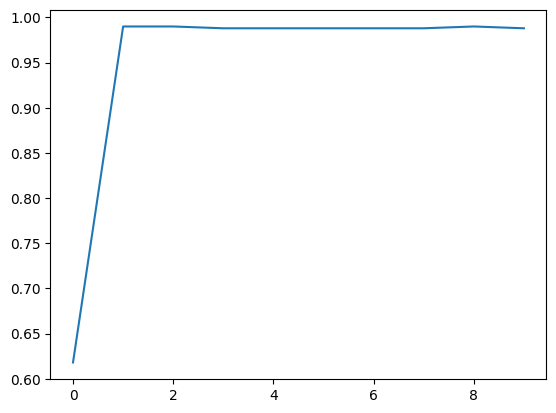

In [30]:
plt.plot(history.history['accuracy'])

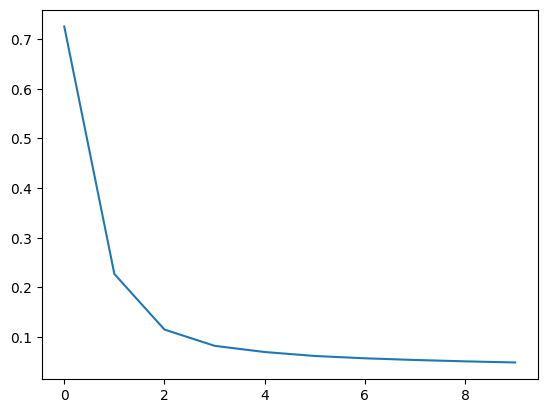

In [31]:
plt.plot(history.history['loss'])

In [32]:
def plot_decision_boundary(X, y, model):
    x_span = np.linspace(X[:,0].min() - 0.25, X[:,0].max() + 0.25, 50)
    y_span = np.linspace(X[:,1].min() - 0.25 , X[:,1].max() + 0.25, 50)
    xx, yy = np.meshgrid(x_span, y_span)
    grid = np.c_[xx.ravel(), yy.ravel()]
    pred_func = model.predict(grid)
    pred_func = np.argmax(pred_func, axis=1)
    z = pred_func.reshape(xx.shape)
    plt.contourf(xx, yy, z)

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


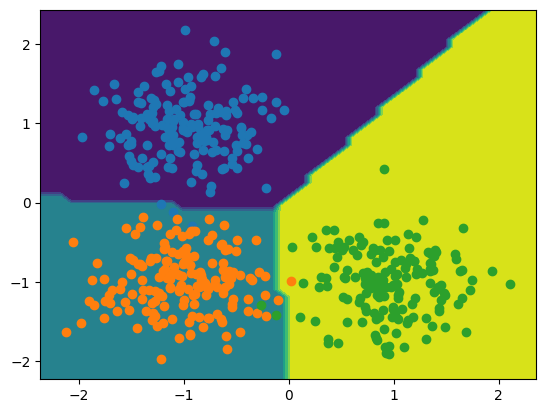

In [33]:
plot_decision_boundary(X, Y, model)
plt.scatter(X[y == 0, 0], X[y == 0, 1])
plt.scatter(X[y == 1, 0], X[y == 1, 1])
plt.scatter(X[y == 2, 0], X[y == 2, 1])

In [34]:
arr = np.array([0,1,2,1])
def too_categorical(arr, n):
  # y = np.array([0,1,2,1])
  # num_classes = 3
  # one_hot_matrix = np.zeros((len(y), num_classes))
  # one_hot_matrix[np.arange(len(y)), y] = 1
  # one_hot_matrix
  return np.eye(n)[arr]
Y = too_categorical(arr, 3)
Y

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.]])

In [35]:
y_reverted = np.argmax(Y, axis=1)
y_reverted

array([0, 1, 2, 1])